# Use different clustering algorithm to find out the optimal number of clusters in the data and performing linear regression on each cluster seperately

## Import the nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading Dataset and each column description is specified below
- **Car Name** – Name of the car
- **Cyl** – No of cylinders in the car – Multi-valued discrete
- **Disp** – Displacement – continuous
- **Hp** – Horsepower – continuous
- **Wt** – Weight – continuous
- **Acc** – Acceleration – continuous
- **Yr** – Model of the car – Multivalued discrete
- **Mpg** - Miles per gallon - continuous

In [2]:
cars = pd.read_csv('cars-dataset.csv')

## Head and Tail of dataset

In [3]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


### Shape of Dataset

In [5]:
cars.shape

(398, 8)

> Original dataset has **8 attributes** and **398 records**.

### To check whether dataset contains null values

In [6]:
print(cars.isna().sum().sum())
print(cars.isnull().sum().sum())

0
0


> No columns have null data in the file

### To check datatypes of each columns

In [7]:
cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

> - From the above observation we can see that horsepower data type is of object but generally horsepower is continuous numrical quantity.
> - So there are non numerical data present in **hp** which is not valid
> - We need to either replace it with valid numerical data or remove particular data.

In [8]:
cars[cars.hp.apply(lambda x: not x.isnumeric())]['hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

> - From the above obeservation there are 6 records in **hp** column with value **'?'** which is not valid.
> - We can remove records having hp = '?' as there are only 6 records.

In [9]:
cars['car name'] = cars['car name'].astype('category')
#obj_df.dtypes
cars['car name'] = cars['car name'].cat.codes
y = cars['mpg']

> - We have converted column 'car name' to numerical data.
> - setting 'mpg' column as target variable 'y' for futher linear regression model.

### Remove records with hp = '?' from dataset.

In [10]:
cars_ = cars.drop('car name',axis = 1)[cars.hp.apply(lambda x: x.isnumeric())].apply(pd.to_numeric)

In [11]:
cars_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null int64
wt      392 non-null int64
acc     392 non-null float64
yr      392 non-null int64
mpg     392 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


> - Using info() method we can observe that there are no numerical values in dataset.
> - Now our dataset has **7 attributes** and **392 records**. We can to our further analysis.

### Using Describe function for stastical analysis of dataset

In [12]:
cars_.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


### Boxplot to analyse each feature individually u.sing original dataset have mpg column

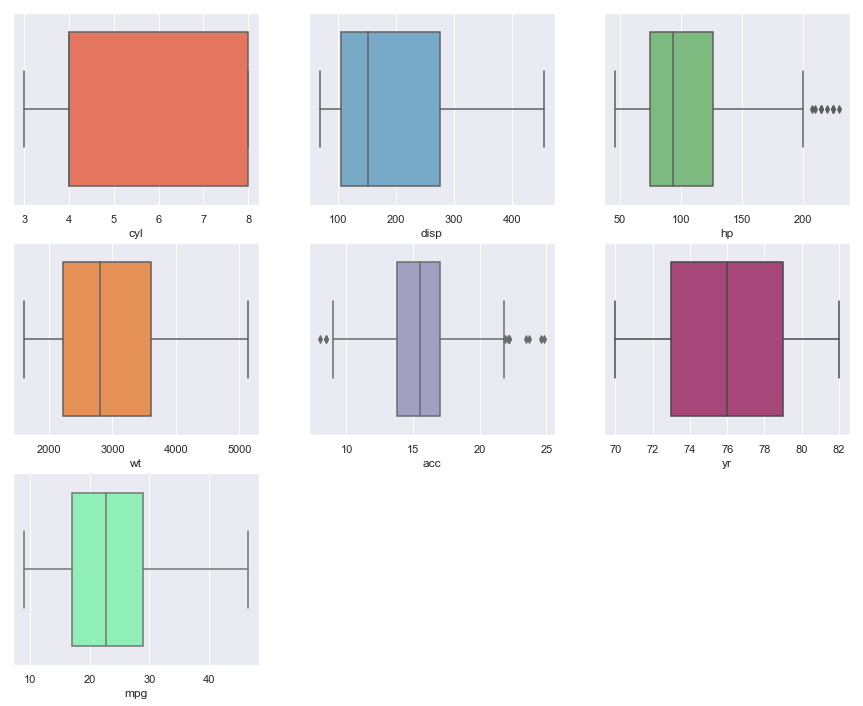

In [13]:
sns.set(style="darkgrid")
#Set up the matplotlib figure
f, axes = plt.subplots(3,3, figsize=(15,12))
sns.boxplot(cars_.cyl, color="r", ax=axes[0,0],palette="Reds")
sns.boxplot(cars_.disp, color="g", ax=axes[0,1],palette="Blues")
sns.boxplot(cars_.hp, color="b", ax=axes[0,2],palette="Greens")
sns.boxplot(cars_.wt, color="r", ax=axes[1,0],palette="Oranges")
sns.boxplot(cars_.acc, color="g", ax=axes[1,1],palette="Purples")
sns.boxplot(cars_.yr, color="b", ax=axes[1,2],palette="magma")
sns.boxplot(cars_.mpg, color="b", ax=axes[2,0],palette="rainbow")
axes[2,1].remove()
axes[2,2].remove();

### Observations from above Boxplot
> + Most of cars having **displacement** between range **100** to **270**.
> + We can obeserve there are outliers present in **Horsepower** and **acceleration**.
> + **Weight** of cars distrubuted maximum between **2200** to **3600** also **mpg**  from **17** to **28**.

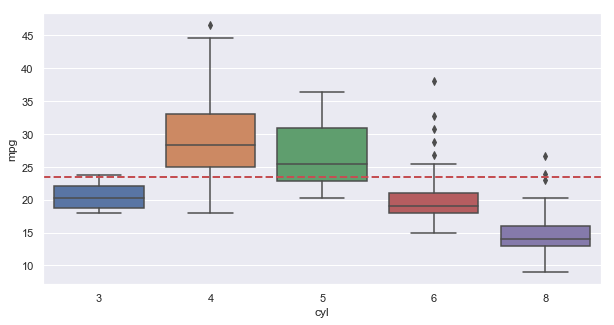

In [14]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = cars['cyl'],y = cars['mpg'])
plt.axhline(cars.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Observations from above Boxplot
> - Cars having cylinder 4 and 5 are having better mpg as compared to cars having cylinder either 3,6 or 8

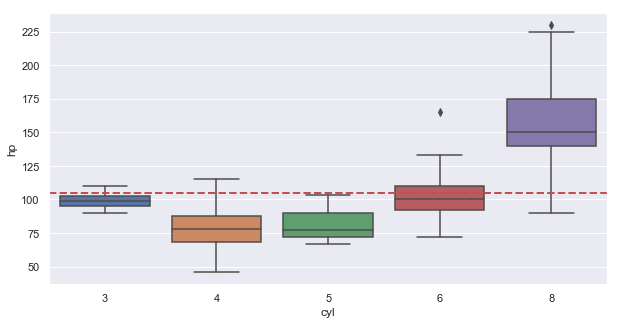

In [15]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = cars_['cyl'],y = cars_['hp'])
plt.axhline(cars_.hp.mean(),color='r',linestyle='dashed',linewidth=2);

> - Generally, an engine with more cylinders produces more power but here as per data in dataset there is not much difference in horsepower
> - only cars with 8 cylinder seems to have more horsepower.

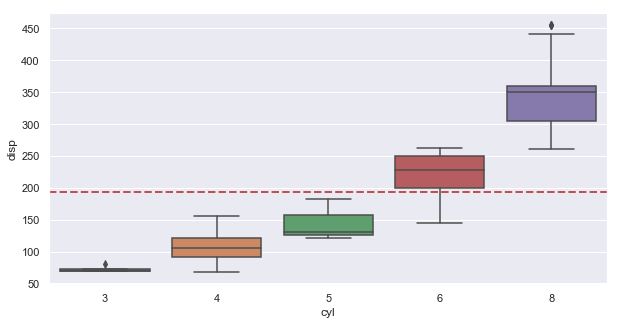

In [16]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = cars['cyl'],y = cars['disp'])
plt.axhline(cars.disp.mean(),color='r',linestyle='dashed',linewidth=2);

> - We can see increase in displacement with number of cylinders.

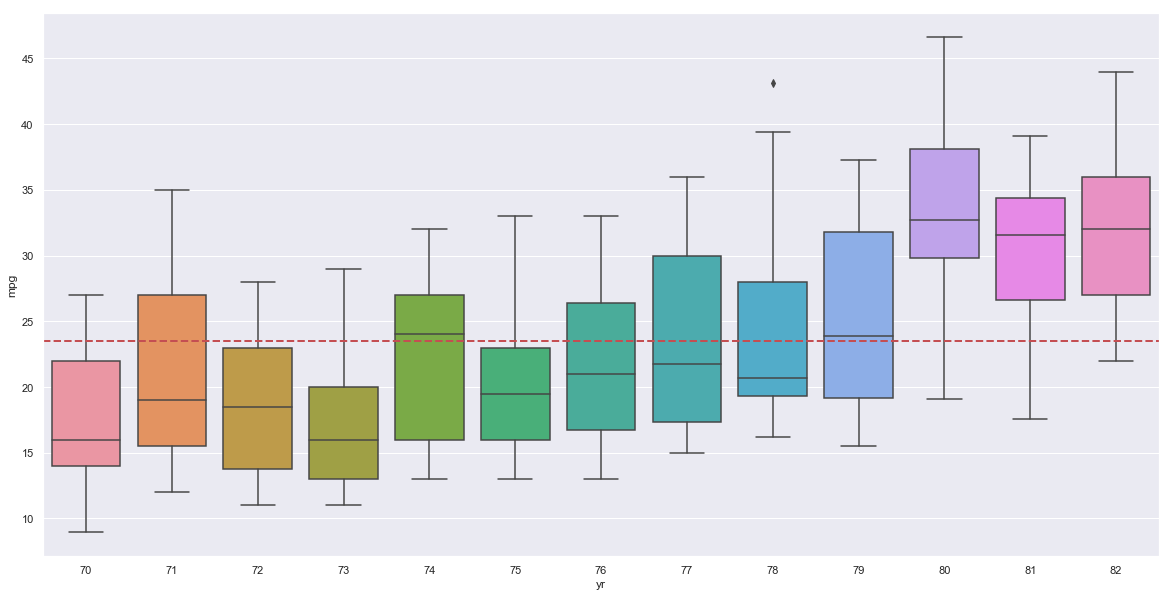

In [17]:
f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = cars['yr'],y = cars['mpg'])
plt.axhline(cars.mpg.mean(),color='r',linestyle='dashed',linewidth=2);

### Observations from above Boxplot
> - mpg of cars has been improved yera by year

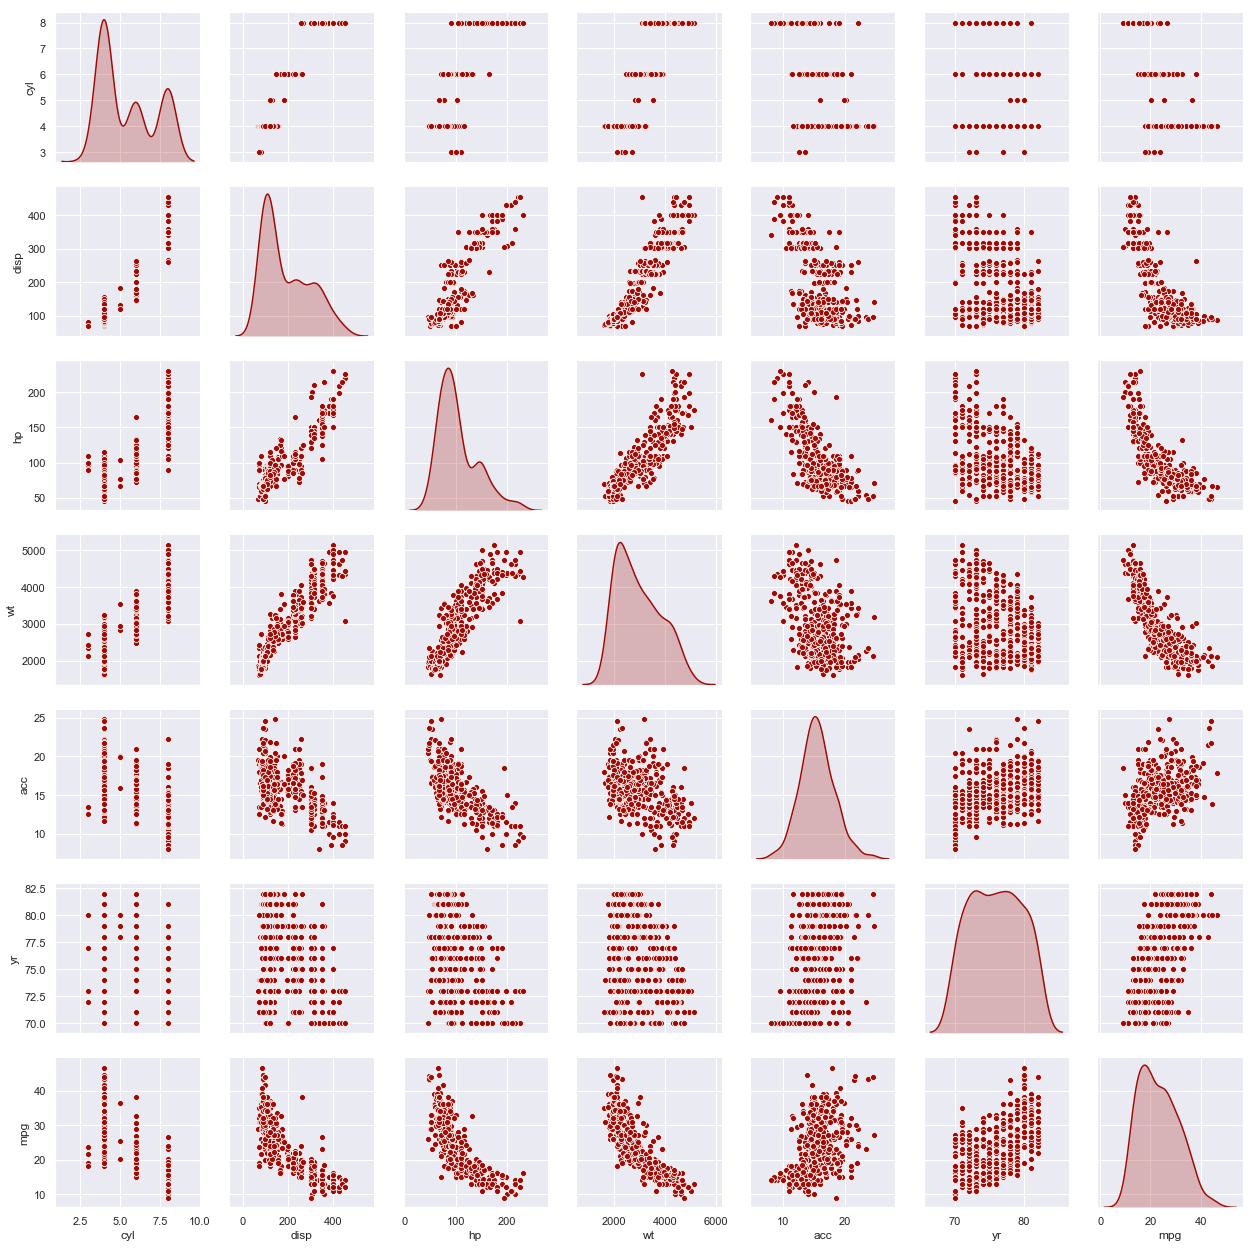

In [18]:
# Create an array with the colors you want to use
colors = ["#9F0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.pairplot(cars_,diag_kind = 'kde');

#### Observations from above Pairplot
> - We can observe **3 peak** in distribution of cylinders which indicates that according to cylinder column we can seperate 3 different type of cars based on Cylinder column.
> - In **Displacement** also we can observe 3 peak by which we can differenciate car types into 3.
> - Though we can't observe clear peak in **mpg** and **year** but 2 slight peak we can see.
> - There is high correlation is present between **disp** and **wt** column.
> - Also we can observe strong negative correlation between **wt** and **disp** with **mpg**.

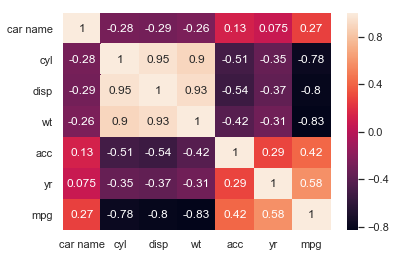

In [19]:
sns.heatmap(cars.corr(),annot = True)

> - We can see actual correlation value in this heatmap.

### Importing necessary libraries to perform Supervised Learning

In [20]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

### Scaling our data using normalization for better model performance

In [21]:
from sklearn.preprocessing import normalize
data_scaled = normalize(cars_)
X = pd.DataFrame(data_scaled, columns=cars_.columns)

### Performing different types of linkage algorithm to see which is one better among them .

In [22]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X)) # pdist captures within cluster variation
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z , pdist(X))
print("Single",c)

Ward 0.7505219414236759
Average 0.8194578075241072
Complete 0.7893572532306988
Single 0.5920687475376748


> - Among all linkage algorithm, 'Average' linkage algorithm is performing better. may be we can use the same for further process.
> - But we further check using dendogram because sometimes visuals speak different story.

### Building dendogram to check better sepeartion of cluster.  

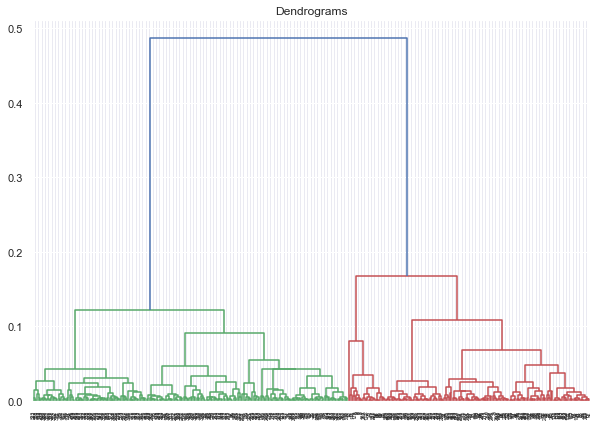

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

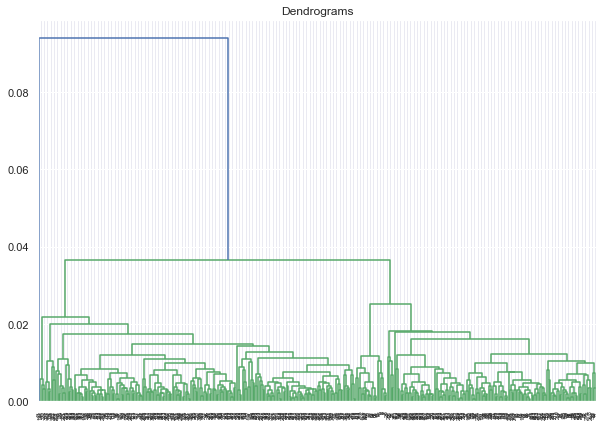

In [24]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))

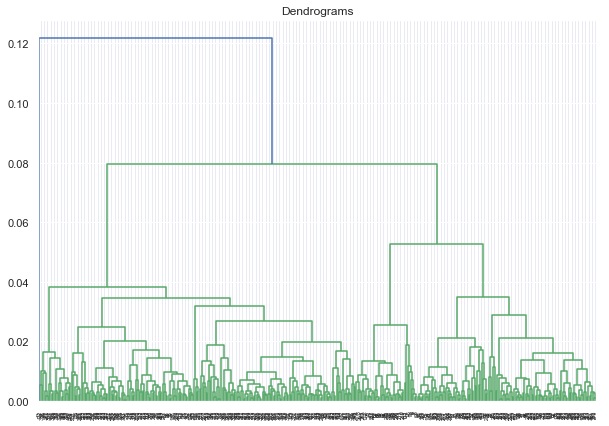

In [25]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))

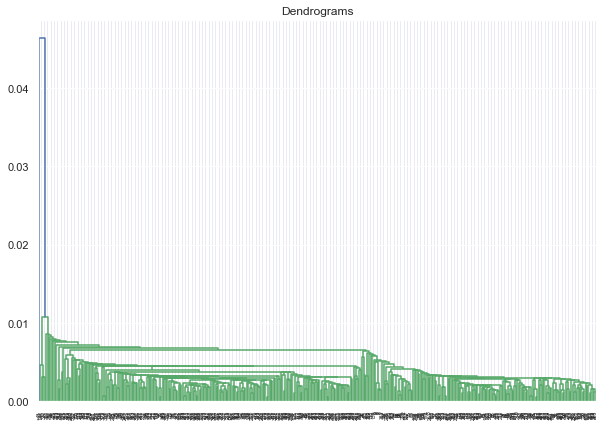

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='single'))

> - From all the above dendogram we can see there is two clear cluster formation in 'Ward' method.
> - 'single', 'average', 'complete' linkage algorithm not performing that good as compared to ward.
> - As per my obeservation 'ward' method is good to perform clustering on given dataset.

### Ward linkage method is selected as per above result, now we will see how many cluster we can form.

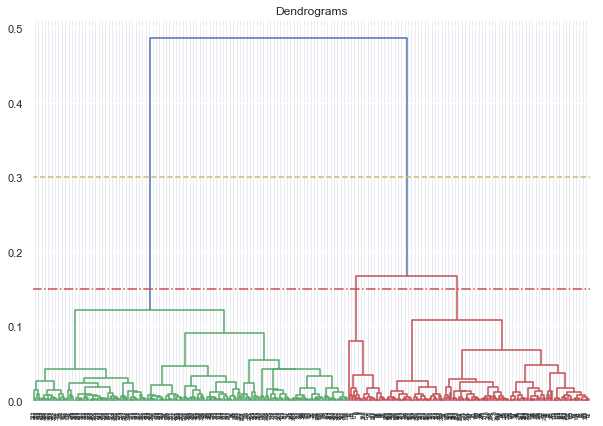

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=0.3, color='y', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='-.')

> - *With clear visual observation let select 2 number of clusters.*

#### Adding labels to dataset as per clustering 

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [29]:
X_lab1 = X.copy()
X_lab1['labels'] = cluster.labels_
X_lab1.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,170,170,170,170,170,170,170
1,222,222,222,222,222,222,222


In [30]:
Cluster = X_lab1.groupby(['labels'])

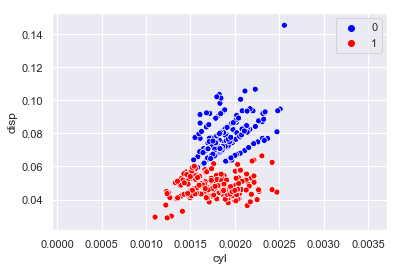

In [31]:
sns.scatterplot(X_lab1.cyl,X_lab1.disp,hue=cluster.labels_,palette=['blue','red']);

## Using hierarchical clustering algorithm we can see there are two cluster formation but both cluster are not that well seperated so we will try to form cluster using Kmean++.

### Let's perform KMean++ to check clustering result.

In [32]:
from sklearn.preprocessing import normalize
data_scaled = normalize(cars_)
X = pd.DataFrame(data_scaled, columns=cars_.columns)

In [33]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range(2, 6)   # expect 2 to 3 clusters from the pair plot and above results hence restricting from 2 to 5
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10,init = 'k-means++')
    clusters.fit(X)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append(clusters.inertia_)      # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df1 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df1

,num_clusters,cluster_errors
0,2,0.056321
1,3,0.039862
2,4,0.032151
3,5,0.027062


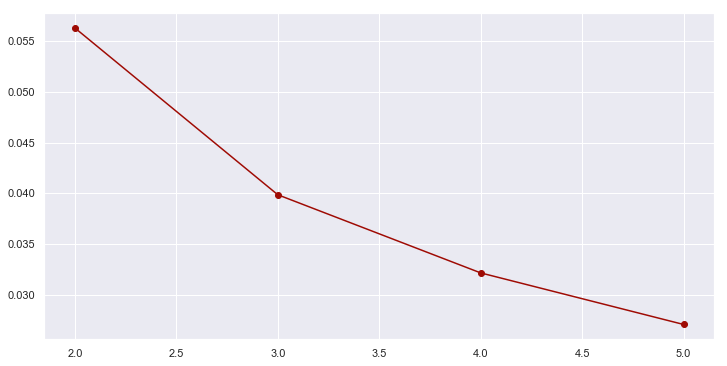

In [34]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df1.num_clusters, clusters_df1.cluster_errors, marker = "o" );

In [35]:
# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)           #kmeans.predict or kmeans.labels_

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values : \n")
print(centroids) # From sci-kit learn

Centroid values : 

[[0.00176649 0.04726174 0.03415473 0.99757943 0.00715191 0.03342953
  0.01269494]
 [0.00188033 0.07225382 0.03240264 0.9965681  0.00444408 0.02125765
  0.00514135]
 [0.00201319 0.09054763 0.04135453 0.99477122 0.00304645 0.01868877
  0.00393276]]


In [36]:
X_lab2 = X.copy()
X_lab2["group"] = labels
X_lab2.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,group
73,0.001857,0.070110,0.032501,0.996856,0.003714,0.016715,0.003018,1
290,0.002020,0.090906,0.037878,0.994920,0.003283,0.019949,0.004672,2
200,0.001872,0.080479,0.029634,0.996001,0.005552,0.023707,0.005459,1
185,0.001892,0.072120,0.033104,0.996669,0.003074,0.017971,0.004138,1
377,0.002030,0.046184,0.034004,0.997269,0.007613,0.041616,0.019286,0
382,0.001543,0.060166,0.035483,0.996989,0.005592,0.031626,0.010028,0
368,0.001393,0.048760,0.032042,0.997836,0.005712,0.028559,0.008359,0
203,0.001852,0.044906,0.034721,0.997653,0.007592,0.035184,0.012963,0
89,0.001608,0.086230,0.039799,0.995365,0.002312,0.014673,0.002412,2
256,0.001770,0.068131,0.030969,0.996899,0.004660,0.023005,0.006076,1


In [37]:
X_lab2.group.value_counts()

0    217
1    116
2     59
Name: group, dtype: int64

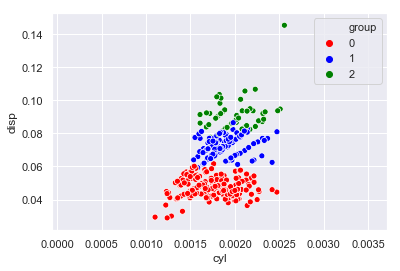

In [38]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
c = np.array([3,3])
sns.scatterplot(X_lab2.cyl,X_lab2.disp,hue = X_lab2.group,palette=['red','blue','green']);

#### Three cluster formation using Kmean++ clustering algorithm which is giving better result than hierarchical clustering algorithm.

# Let's perform Linear regression on different clusters separately

In [39]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D 

X_cl0 = X_lab2.drop(['mpg','group'],axis = 1)[X_lab2['group'] == 0]
y_cl0 = X_lab2[X_lab2['group'] == 0]['mpg']

X_cl1 = X_lab2.drop(['mpg','group'],axis = 1)[X_lab2['group'] == 1]
y_cl1 = X_lab2[X_lab2['group'] == 1]['mpg']

X_cl2 = X_lab2.drop(['mpg','group'],axis = 1)[X_lab2['group'] == 2]
y_cl2 = X_lab2[X_lab2['group'] == 2]['mpg']

> - We have created 3 different dataframe based on different clusters forms in previous step.
> - X_cl0 , y_cl0 are for cluster with label 0.
> - X_cl1 , y_cl1 are for cluster with label 1.
> - X_cl2 , y_cl2 are for cluster with label 2.

### Spltting dataset into respective X_train, X_test, y_train and y_test with 80:20 ratio.

In [40]:
from sklearn.model_selection import train_test_split

X_train0,X_test0,y_train0,y_test0 = train_test_split(X_cl0,y_cl0,test_size = 0.2,random_state=5)
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_cl1,y_cl1,test_size = 0.2,random_state=5)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_cl2,y_cl2,test_size = 0.2,random_state=5)

### Creating three different regression model for respective clusters and fitting the data into model.

In [41]:
regressor0 = LinearRegression()
regressor1 = LinearRegression()
regressor2 = LinearRegression()

In [42]:
regressor0.fit(X_train0,y_train0)
regressor1.fit(X_train1,y_train1)
regressor2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
predicted0 = regressor0.predict(X_test0)
predicted1 = regressor1.predict(X_test1)
predicted2 = regressor2.predict(X_test2)

### Using different metric to check each model performance.

In [44]:
from sklearn.metrics import r2_score

print('R-SQUARED VALUE FOR FIRST LINEAR REGRESSOR MODEL : ',r2_score(y_test0,predicted0))
print('R-SQUARED VALUE FOR SECOND LINEAR REGRESSOR MODEL : ',r2_score(y_test1,predicted1))
print('R-SQUARED VALUE FOR THIRD LINEAR REGRESSOR MODEL : ',r2_score(y_test2,predicted2),'\n')
print('***************************************************************************************\n')
score0 = regressor0.score(X_train0,y_train0)
score1 = regressor1.score(X_train1,y_train1)
score2 = regressor2.score(X_train2,y_train2)
print('Score0 :', score0, 'Score1 :', score1, 'Score2 :', score2,'\n')
print('***************************************************************************************\n')
#To retrieve the intercept:
print('INTERCEPT FOR FIRST LINEAR REGRESSOR MODEL : ', regressor0.intercept_)
print('INTERCEPT FOR SECOND LINEAR REGRESSOR MODEL : ', regressor1.intercept_)
print('INTERCEPT FOR THIRD LINEAR REGRESSOR MODEL : ',regressor2.intercept_, '\n')
print('***************************************************************************************\n')
#For retrieving the slope:
print('COEFFICIENT FOR FIRST LINEAR REGRESSOR MODEL : \n',regressor0.coef_,'\n')
print('COEFFICIENT FOR SECOND LINEAR REGRESSOR MODEL : \n',regressor1.coef_,'\n')
print('COEFFICIENT FOR THIRD LINEAR REGRESSOR MODEL : \n',regressor2.coef_)

R-SQUARED VALUE FOR FIRST LINEAR REGRESSOR MODEL :  0.9143791803913072
R-SQUARED VALUE FOR SECOND LINEAR REGRESSOR MODEL :  0.8758836442366306
R-SQUARED VALUE FOR THIRD LINEAR REGRESSOR MODEL :  0.729067876997854 

***************************************************************************************

Score0 : 0.8972555233458501 Score1 : 0.8891811593836241 Score2 : 0.7766975666386018 

***************************************************************************************

INTERCEPT FOR FIRST LINEAR REGRESSOR MODEL :  16.417671886631197
INTERCEPT FOR SECOND LINEAR REGRESSOR MODEL :  8.018612635237831
INTERCEPT FOR THIRD LINEAR REGRESSOR MODEL :  -0.41144443083894044 

***************************************************************************************

COEFFICIENT FOR FIRST LINEAR REGRESSOR MODEL : 
 [  0.33129637  -0.77279576  -0.67324595 -16.38518806  -0.27591556
   0.04352471] 

COEFFICIENT FOR SECOND LINEAR REGRESSOR MODEL : 
 [ 0.29113227 -0.56537732 -0.31445798 -7.99565637 -0

### Root mean sqare for different model

In [45]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse0 = sqrt(mean_squared_error(y_true=y_test0,y_pred=predicted0))
print('rmse0 : ' , rmse0)

rmse1 = sqrt(mean_squared_error(y_true=y_test1,y_pred=predicted1))
print('rmse1 : ' , rmse1)

rmse2 = sqrt(mean_squared_error(y_true=y_test2,y_pred=predicted2))
print('rmse2 : ' , rmse2)

rmse0 :  0.0012426742587112538
rmse1 :  0.000594399918898969
rmse2 :  0.00042469824866914007


 ### In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen

In [46]:
coeff_df0 = pd.DataFrame(regressor0.coef_, X_test0.columns, columns=['Coefficient'])  
coeff_df0

,Coefficient
cyl,0.331296
disp,-0.772796
hp,-0.673246
wt,-16.385188
acc,-0.275916
yr,0.043525


In [47]:
coeff_df1 = pd.DataFrame(regressor1.coef_, X_test1.columns, columns=['Coefficient'])  
coeff_df1

,Coefficient
cyl,0.291132
disp,-0.565377
hp,-0.314458
wt,-7.995656
acc,-0.261522
yr,0.302765


In [48]:
coeff_df2 = pd.DataFrame(regressor2.coef_, X_test2.columns, columns=['Coefficient'])  
coeff_df2

,Coefficient
cyl,-0.356202
disp,0.068296
hp,-0.022755
wt,0.406377
acc,0.415060
yr,0.287782


### Comparison of actual value and predicted value for linear model created for cluster with label 0

In [49]:
df0 = pd.DataFrame({'Actual': y_test0, 'Predicted': predicted0})
df0

,Actual,Predicted
58,0.010185,0.012212
143,0.015941,0.015317
386,0.009132,0.008844
141,0.011281,0.011178
76,0.008743,0.009014
377,0.019286,0.019036
347,0.016778,0.017030
78,0.011853,0.011644
23,0.011600,0.011397
330,0.011202,0.009669


### Comparison of actual value and predicted value for linear model created for cluster with label 1

In [50]:
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': predicted1})
df1

,Actual,Predicted
124,0.006429,0.006255
133,0.004969,0.004870
258,0.005125,0.005150
67,0.002877,0.002776
87,0.003451,0.003510
36,0.005457,0.005040
305,0.009892,0.009186
136,0.003131,0.002885
160,0.004009,0.004219
28,0.001896,0.001897


### Comparison of actual value and predicted value for linear model created for cluster with label 2

In [51]:
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': predicted2})
df2

,Actual,Predicted
89,0.002412,0.002642
188,0.003425,0.003794
94,0.002411,0.002547
260,0.005577,0.005234
288,0.003806,0.004523
42,0.002727,0.002845
210,0.003751,0.003207
69,0.002925,0.003215
64,0.003376,0.003681
85,0.003796,0.004048
